In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale
from collections import Counter

In [82]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [83]:
train.shape,test.shape

((348978, 51), (523466, 50))

In [84]:
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)

In [85]:

def plot(x=None, y=None, hue=None, data=None,name='',barplot=False,countplot=False,boxplot=False,factorplot=False):
    data=pd.DataFrame(data)
    plt.figure(figsize=(14,9))
    if type(data[x].values[1])==str:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[x]=data[x].apply(lambda y:treat_cat(y))
        data[x]=le.fit_transform(data[x])
    else:
        me=np.mean(data[x])
        data[x]=data[x].apply(lambda y: treat_num(y,m=me))
    try:
        print(name,'\n')
        data[x].hist()
        plt.show()
    except:
        print('cannot plot histogram\n')
    
    try:
        print(name,'\n')
        sns.distplot(train[x])
        plt.show()
    except:
        print('cannot plot distplot\n')
        
    if barplot:
        try:
            print(name,'\n')
            sns.barplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot barplot\n')
    if countplot:        
        try:
            print(name,'\n')
            sns.countplot(data[x])
            plt.show()
        except:
            print('cannot plot countplot\n')
    if boxplot:        
        try:
            print(name,'\n')
            sns.boxplot(x=x,y=y,hue=hue,data=data)
            plt.show()
        except:
            print('cannot plot boxplot\n')  
    if factorplot:        
        try:
            print(name,'\n')
            data=pd.DataFrame(data)
            sns.factorplot(x=x,y=y,data=data,size=14)
            plt.show()
        except:
            print('cannot plot factorplot\n')  
            
def plotHeatMap(df, size=(16,9),an=True):
    plt.figure(figsize=size)
    cmap = plt.cm.viridis
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.2,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()
    
def treat_cat(tmp):
    if tmp!=tmp:
        return 'unknown'
    else:
        return tmp
    
def max_min(data):
    data=pd.DataFrame(data)
    print('max = '+str(max(data.values.ravel()))+'  min = '+str(min(data.values.ravel())))

def data_type(data):
    data=pd.DataFrame(data)
    for i in data.values.ravel():
        if i==i:
            return type(i)

def describe(data,with_plot=False):
    null_values(data)
    if data_type(data)==str:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data=data.apply(lambda y:treat_cat(y))
        data=le.fit_transform(data)
    else:
        me=np.mean(data)
        data=data.apply(lambda y: treat_num(y,m=me))
    data=pd.DataFrame(data)
    max_min(data)
    non_zero(data)
    print(data.describe(),'\n')
    if with_plot:
        plot(x=[i for i in data.columns][0],data=data)

def non_zero(data):
    data=pd.DataFrame(data)
    print('non zero values = '+str(len(data[data.values.ravel()!=0]))+
         '   zero values = '+str(len(data[data.values.ravel()==0])))

def drop(data=None,col=None):
    return data.drop([i for i in col],axis=1)
    
def null_values(data):
     print('null values = '+str(len(data[data!=data])))
        
def treat_num(x,m):
    if x!=x:
        return m
    else:
        return x
    
def show_percentile(x=None,data=None,lb=0,ub=100):
    lb,ub=np.percentile(data[x],q=(lb,ub),axis=0)
    print('sacrifice : ',len(data[x])-len(data[(data[x]>=lb) &(data[x]<=ub)]))
    describe(data[x][(data[x]>=lb) &(data[x]<=ub)])
    
def apply_percentile(x=None,data=None,lb=0,ub=100):
    lb,ub=np.percentile(data[x],q=(lb,ub),axis=0)
    return data[(data[x]>=lb) &(data[x]<=ub)]

def count(data):
    from collections import Counter
    print(Counter(data))
    
def consider_unknown(data,li):
    if data in li:
        return data
    else :
        return 'unknown'

# removing Outliers after visualization from EDA

Treating number variable

In [86]:
#in num_var_1 found that removing 99.9 data (343 total) would be good as there are not too many data loss
lb,ub=np.percentile(train['num_var_1'],q=(0,99.9),axis=0)
test['num_var_1']=[ub if i>ub else(lb if i<lb else i) for i in test['num_var_1'].values.ravel()]
train=apply_percentile(x='num_var_1',data=train,ub=99.9)

In [87]:
#in num_var_3, found only 12 none zero values are there, so drop it
train=drop(train,col=['num_var_3'])
test=drop(test,col=['num_var_3'])

In [88]:
# in num_var_4 variable, applying 99.95 cut seems resonable as only 255 sacrifices
lb,ub=np.percentile(train['num_var_4'],q=(0.025,99.95),axis=0)
test['num_var_4']=[ub if i>ub else(lb if i<lb else i) for i in test['num_var_4'].values.ravel()]
train=apply_percentile(x='num_var_4',data=train,ub=99.95,lb=0.025)

In [89]:
# in num_var_6 variable, applying 99.94 cut seems resonable as only 210 sacrifices
lb,ub=np.percentile(train['num_var_6'],q=(0,99.94),axis=0)
test['num_var_6']=[ub if i>ub else(lb if i<lb else i) for i in test['num_var_6'].values.ravel()]
train=apply_percentile(x='num_var_6',data=train,ub=99.94,lb=0)

In [90]:
# in num_var_7 variable, applying 99.99 cut seems resonable as only 35 sacrifices
lb,ub=np.percentile(train['num_var_7'],q=(0,99.99),axis=0)
test['num_var_7']=[ub if i>ub else(lb if i<lb else i) for i in test['num_var_7'].values.ravel()]
train=apply_percentile(x='num_var_7',data=train,ub=99.99,lb=0)

Categorical treatment

In [91]:
# drop below columns as almost 99% rows are zero's
train=drop(train,col=['cat_var_25','cat_var_26','cat_var_27',
                'cat_var_28','cat_var_29','cat_var_30','cat_var_31',
               'cat_var_32','cat_var_33','cat_var_34','cat_var_35',
               'cat_var_36','cat_var_37','cat_var_38','cat_var_39',
               'cat_var_40','cat_var_41','cat_var_42'])

test=drop(test,col=['cat_var_25','cat_var_26','cat_var_27',
                'cat_var_28','cat_var_29','cat_var_30','cat_var_31',
               'cat_var_32','cat_var_33','cat_var_34','cat_var_35',
               'cat_var_36','cat_var_37','cat_var_38','cat_var_39',
               'cat_var_40','cat_var_41','cat_var_42'])

In [92]:
# Counter({1: 347898, 0: 237}) -train drop cat_var_24 Counter({1: 522995, 0: 471})-test
train=drop(train,col=['cat_var_24'])
test=drop(test,col=['cat_var_24'])

In [93]:
# from describe, found cat_var_19 and cat_var_20 bot are complement of each other, so drop any one
train=drop(train,col=['cat_var_20'])
test=drop(test,col=['cat_var_20'])

In [94]:
train.columns,'\n\n',test.columns

(Index(['transaction_id', 'num_var_1', 'num_var_2', 'num_var_4', 'num_var_5',
        'num_var_6', 'num_var_7', 'cat_var_1', 'cat_var_2', 'cat_var_3',
        'cat_var_4', 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_8',
        'cat_var_9', 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13',
        'cat_var_14', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18',
        'cat_var_19', 'cat_var_21', 'cat_var_22', 'cat_var_23', 'target'],
       dtype='object'),
 '\n\n',
 Index(['transaction_id', 'num_var_1', 'num_var_2', 'num_var_4', 'num_var_5',
        'num_var_6', 'num_var_7', 'cat_var_1', 'cat_var_2', 'cat_var_3',
        'cat_var_4', 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_8',
        'cat_var_9', 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13',
        'cat_var_14', 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18',
        'cat_var_19', 'cat_var_21', 'cat_var_22', 'cat_var_23'],
       dtype='object'))

In [95]:
train.shape,test.shape

((348135, 30), (523466, 29))

In [96]:
for i in train.columns:
    if 'cat' in i and len(set(train[i].values)) != len(set(test[i])):
        print(i,'  ',len(set(train[i].values)) - len(set(test[i])))
        
        
# 1,2,3,6,7,8

cat_var_1    -7
cat_var_2    -2
cat_var_3    -2
cat_var_6    -1
cat_var_7    -4
cat_var_8    -7


# Encoding

In [97]:
#It was found that some of the categories in test are different than the train data, so
#i think these different values shpuld be treated as unknown values
# In above solution , a problem occured, there were some columns in train which do not 
# have misssing value so no unknown were there and thus this new test unknown became another unknown :P 
# Now found a solution , simply fit on all data(train+test)  and then transform separately

#treating nan's

from sklearn.preprocessing import LabelEncoder

for i in train.columns:
    if i not in ['transaction_id','target']:
        if data_type(train[i])==str:
            le=LabelEncoder()
            train[i]=train[i].apply(lambda x:treat_cat(tmp=x))
            test[i]=test[i].apply(lambda x:treat_cat(tmp=x))
#             lis=train[i].values.tolist()
            le.fit(pd.concat([train[i],test[i]],axis=0))
            train[i]=le.transform(train[i])
            
#             test[i]=test[i].apply(lambda x:consider_unknown(data=x,li=lis))
            test[i]=le.transform(test[i])
        else:
            me=np.mean(train[i])
            train[i]=train[i].apply(lambda y:treat_num(m=me,x=y))
            me=np.mean(test[i])
            test[i]=test[i].apply(lambda y:treat_num(m=me,x=y))

In [98]:
train.head()

,transaction_id,num_var_1,num_var_2,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,cat_var_3,cat_var_4,cat_var_5,cat_var_6,cat_var_7,cat_var_8,cat_var_9,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,cat_var_19,cat_var_21,cat_var_22,cat_var_23,target
0,id_11,2.302632e-08,0.040182,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,425,3,74,0,1,248,4,366,4,3,3,1,19,1,0,1,1,0,0,1,0,0,0
1,id_33,7.965789e-06,0.157872,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,65,50,607,1,0,148,4,366,2,15,3,3,14,1,1,1,1,1,1,1,0,0,0
2,id_51,7.828947e-08,0.089140,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,127,3,157,1,0,512,4,59,2,12,0,4,16,1,0,1,1,0,1,1,0,0,0
3,id_54,7.894737e-08,0.227239,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,425,3,139,0,0,336,4,346,1,5,3,1,3,11,0,1,1,0,1,1,0,0,0
4,id_62,3.321053e-06,0.160410,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,65,50,609,1,0,148,4,366,1,20,2,3,14,1,1,1,1,1,1,1,0,0,0


In [99]:
count(data=train['target'])

Counter({0: 311063, 1: 37072})


In [100]:
ratio=37072/311063

In [101]:
ratio

0.11917843009293937

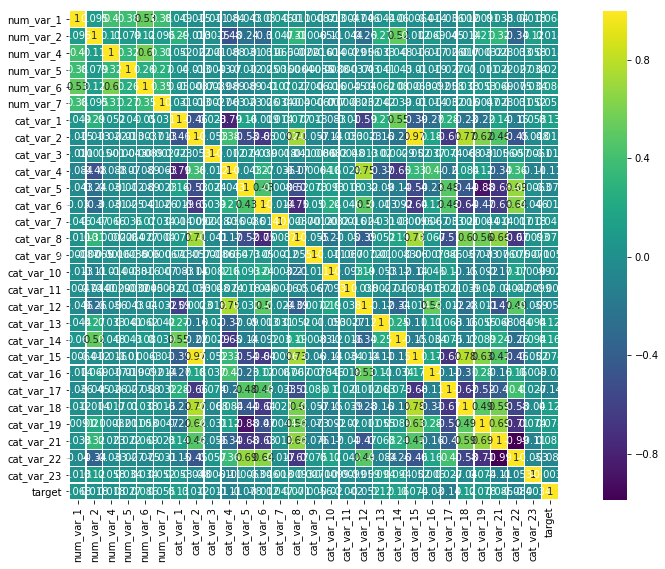

In [102]:
plotHeatMap(train)

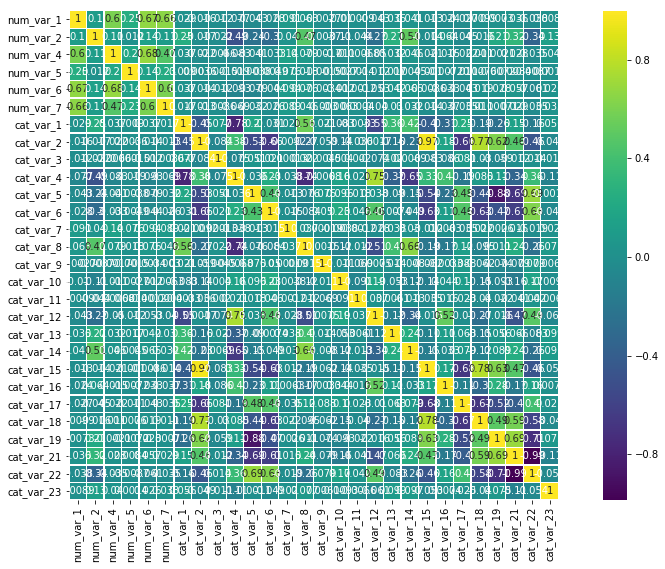

In [103]:
plotHeatMap(test)

# data is now cleaned, saving final train and test data

In [104]:
# train.to_csv('cleaned_train.csv',index=False)
# test.to_csv('cleaned_test.csv',index=False)

In [22]:
# describe(data=train['cat_var_21'],with_plot=True)
# describe(data=train['cat_var_22'],with_plot=True)

In [23]:
# show_percentile(x='num_var_1',data=train,lb=0,ub=99.9)